# Homework 08: Hypothesis Testing, P-values, Bootstrapping
***

**Name**: Matthew Riopelle

***

This assignment is due on Canvas by **6:00PM on Friday November 4**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

The standard imports for this HW:

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import scipy.stats as stats
from scipy.stats import norm

# Problem 1

In this HW you will need to use `.std()` when you are finding the test statistic. However, there are two kinds of standard deviations: those for a $\color{red}{\text{sample}}$ and those for a $\color{blue}{\text{population}}$.

Consider the python list below:

In [2]:
py_list = [4,2,3,4,2,3]

***(3 points)*** Find both the sample standard deviation and the popluation standard deviation by hand.

TeX your work below:


Solution:
$\textbf{First I will find the population std dev:}$

$\sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \mu)^2}{n}}$

$\sum_{i=1}^n (x_i - \mu)^2 = (4-3)^2 + (2-3)^2 + (3-3)^2 + (4-3)^2 + (2-3)^2 + (3-3)^2 = 1^2 + -1^2 + 1^2 + -1^2 = 4$

$\sigma = \sqrt{\frac{4}{6}} = .81649$

$\textbf{Now, I will find the sample standard deviation:}$

$s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{X})^2}{n-1}} = \sqrt{\frac{4}{5}} = .894427$

***(2 points)*** Make an array from `py_list` and call it `np_array`.

In [3]:
# Code your answer here:
np_array = np.array(py_list)

***(2 points)*** Make a Pandas Series from the list and call it `dfSeries`.

In [4]:
# Code your answer here:
dfSeries = pd.Series(py_list)

***(2 points)*** Find `np_array.std()` and `dfSeries.std()`.

What type of standard deviation does `np_array.std()` return?

What type of standard deviation does `dfSeries.std()` return?

In [5]:
# Code your solution here:
popdev = np_array.std()
sampledev = dfSeries.std()
print("np_array.std() yields a std dev of {}, which means that it is the population deviation.".format(popdev))
print("dfSeries.std() yields a std dev of {}, which means that it is the sample deviation.".format(sampledev))

np_array.std() yields a std dev of 0.816496580927726, which means that it is the population deviation.
dfSeries.std() yields a std dev of 0.8944271909999159, which means that it is the sample deviation.


***(2 points)*** Now find `np_array.std(ddof=0)` and `dfSeries.std(ddof=0)`, and `np_array.std(ddof=1)` and `dfSeries.std(ddof=1)`.

What do these return?

In [6]:
# Code your answer here:
arrayPop = np_array.std(ddof=0)
arraySam = np_array.std(ddof=1)
seriesSam = dfSeries.std(ddof=0)
seriesPop = dfSeries.std(ddof=1)
print("np_array.std(ddof = 0) returns {}".format(arrayPop))
print("np_array.std(ddof = 1) returns {}".format(arraySam))
print("dfSeries.std(ddof = 0) returns {}".format(seriesSam))
print("dfSeries.std(ddof = 1) returns {}".format(seriesPop))
print("Regardless of which type (panda or numpy) we use, if we put ddof = 0, we get the population deviation. If we put ddof = 1, we get the sample deviation.")

np_array.std(ddof = 0) returns 0.816496580927726
np_array.std(ddof = 1) returns 0.8944271909999159
dfSeries.std(ddof = 0) returns 0.816496580927726
dfSeries.std(ddof = 1) returns 0.8944271909999159
Regardless of which type (panda or numpy) we use, if we put ddof = 0, we get the population deviation. If we put ddof = 1, we get the sample deviation.


# Problem 2

A nematologist is interested in determining whether a new worm food (wood bark treated with peanut butter) results in shorter worm length than the standard length of 15.7 cm.

Shorter worms are more desirable as they tend to be stronger and live longer.

The nematologist feeds a random sample of worms with the new food and subsequently obtained the worm lengths found in the `csv` file `worm.csv`.

If the nematologist has in fact discovered a healthy new worm food then this food formula can be patented and sold world wide!

Therefore, the nematologist has hired you to explain whether or not this new food outperforms (with respect to worm length) the old worm food.

***(read-in)*** Read in the csv file here:

In [7]:
# read in worm.csv
dfWorm = pd.read_csv("worm.csv")

***(1 point)*** Take a look at the first 5 rows of data.

In [8]:
# code here for looking at data:
dfWorm.head(5)

,length
0,11.5
1,15.2
2,16.5
3,15.1
4,11.8


In order to determine whether or not this new worm food outperforms the standard food, you and the nematologist decide on a hypthesis test run at the 5% significance level.

***(2 points)*** What does a 5% significance level mean?


Solution: The significance level is an indicator of the largest probability of test stats occuring under the null hypothesis that would lead to a rejection. For example, if our alternative hypothesis was that $\mu  > 200$, we would have to have our test statistic (and its corresponding z score) be greater than that of .05 (significance level z-score). So, if the zscore for our test stat > 1.645 (which is stats.norm.ppf(.95)), then we are able to reject the null hypothesis.

Likewise, if it was $\mu < 200$, we would compare the corresponding test statistic to the critical value of -1.644 (stats.norm.ppf(.05))


***(2 points)*** What is the null hypothesis and alternate hypothesis for this test?

Solution:

$H_0: \mu = 15.7$ (the null hypothesis is that the average length of the worm is still 15.7)

$H_A: \mu < 15.7$ (the alternative hypothesis is that the new word food makes their average length less than 15.7)

***(1 point)*** How many worms were in this sample?

In [9]:
# code your answer here:
numWorms = dfWorm['length'].count()
print("There are {} worms in this dataset".format(numWorms))

There are 33 worms in this dataset


***(1 point)*** What is the mean of the sample?

In [10]:
# Code your solution here:
meanWorms = dfWorm['length'].mean()
print("The average length of worms in the sample is {}cm.".format(meanWorms))

The average length of worms in the sample is 13.663636363636364cm.


***(1 point)*** What is the standard deviation of the sample?


In [11]:
# Code your answer here:
#could put DDOF = 1 below, but both std() and std(ddof = 1) yield sample std deviations
sampleDevWorms = dfWorm['length'].std()
print("The sample standard deviation of the worms is {}cm.".format(sampleDevWorms))

The sample standard deviation of the worms is 2.5435971307650833cm.


***(2 points)*** What is the critical value?

In [12]:
# Code your answer here:
critValue = stats.norm.ppf(.05)
print("The critical value of a 5% significance level is {}.".format(critValue))

The critical value of a 5% significance level is -1.6448536269514729.


***(2 points)*** What is the test statistic?

In [13]:
# Code your answer here:
print("The test stat is the mean ({}) of the sample. I will convert it into a z-score.".format(meanWorms))
zScoreCrit = (meanWorms - 15.7)/(sampleDevWorms)
print("The z-score of the test statistic is {}".format(zScoreCrit))

The test stat is the mean (13.663636363636364) of the sample. I will convert it into a z-score.
The z-score of the test statistic is -0.8005841851815274


***(3 points)*** What is the conclusion?


Solution:

Since our test statistic is greater than that of our critical value, we $\textbf{Fail to reject the null hypothesis}$. This means that we do not have significant enough evidence to prove that the new food makes worms shorter.

$-0.80 > -1.64$

Instead of using a critical value to determine the above answer about the worm food, suppose you decide to base your decision on the p-value for this same data.

***(2 points)*** In general, what is it that a p-value measures?

Solution:

The p-value measures the probability, under the null hypothesis, that we get a test statstic at LEAST as extreme as the one we calculated. If we have that our p_value $\leq$ significance level, we reject the null hypothesis. If we have P-value > significance level, we fail to reject the null hypothesis.

***(2 points)*** What is the p-value for this experiment?

In [14]:
# Code your answer here:
pVal = stats.norm.cdf(zScoreCrit)
print("The p-value for this experiment is p = {}".format(pVal))

The p-value for this experiment is p = 0.21168620462000642


***(2 points)*** According to the p-value, should we reject the null or fail to reject the null?

Solution:

We have that 0.2116 > 0.05 (p value > a), so we $\textbf{fail to reject the null hypothesis.}$

This means that we do not have significant enough evidence to prove that the new food makes the worms smaller.

***(2 points)*** Will the decisions concerning rejecting the null ever be different with respect to using a critical number versus a p-value?

Solution:

While these two different approaches to evaluating a null hypothesis are different in their execution, they ALWAYS yield the same result. Therefore, we do not have to worry about the RESULT being different. In p-values we are testing probability that we get an extreme stat, where as with critical number we are comparing the z-score of that happening. $\textbf{They are two different approaches with the exact same result.}$

***(2 points)*** According to the acquired p-value what is the largest confidence interval we could have used to reject the null hypothesis?

In [15]:
# Code you solution here:
largestConfInterval = 1 - pVal
print("The largest confidence interval we could use while still rejecting the null hypothesis is {}%".format(largestConfInterval * 100))

The largest confidence interval we could use while still rejecting the null hypothesis is 78.83137953799935%


# Problem 3
***
Widg's are fairly rare and difficult to come by.

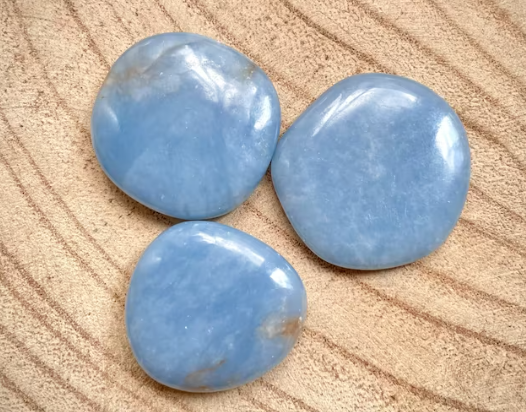

In order to determine the density of a widg, one must destroy them with a crushing mechanism. A sample of of $n=200$ widg densities has been determined.

From this sample, we would like to determine the probable density of other widgs' in the population. Of course we don't want to crush anymore widgs and they are hard to come by, so we will have to make due with this one sample.

The csv file `strap.csv` is the sample ($n=200$) obtained from a distribution of widg densities. 

***(read-in)*** load the csv into a dataframe called dfWidg.

In [16]:
# Code your work here:
dfWidg = pd.read_csv("strap.csv")
dfWidg

,widg
0,2
1,3
2,3
3,1
4,1
...,...
195,4
196,2
197,3
198,2


***(4 points)*** Write a function to draw $10000$ bootstrapped resamples (with replacement) from this sample of 200 widg densities and compute a bootstrapped confidence interval for the mean at the 90% confidence level.


In [17]:
# Code your answer here:
sample = dfWidg['widg'].sample(n=200)
def meanBootstrap(sample):
    num_boots = 10000
    arrayMeans = np.array([np.mean(np.random.choice(sample, replace=True, size=len(sample))) for ii in range(num_boots)])
    l = np.percentile(arrayMeans, 5.0)
    u = np.percentile(arrayMeans, 95.0)
    CI = np.array([l,u])
    return CI

meanBootstrap(sample)

array([2.39 , 2.705])

***(2 points)*** What is the meaning of this 90% CI?

Solution:

This means that 90% of the time, this bootstrapping algorithm results in an interval containing the true mean of the population.

***(4 points)*** write a function that will graph a $\color{red}{\text{histogram}}$ of our 10000 bootstrap samples with the $\color{blue}{\text{confidence interval}}$ superimposed on the histogram.

BTW, choose your own colors: https://datascientyst.com/full-list-named-colors-pandas-python-matplotlib/


array([2.385, 2.7  ])

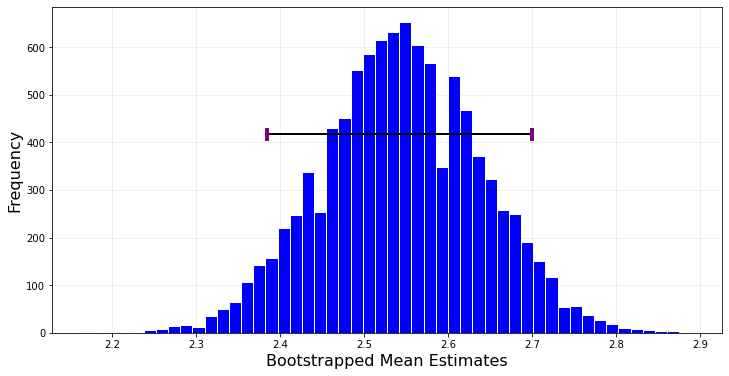

In [18]:
# Code your answer here:
ample = dfWidg['widg'].sample(n=200)
def meanBootstrap(sample):
    num_boots = 10000
    arrayMeans = np.array([np.mean(np.random.choice(sample, replace=True, size=len(sample))) for ii in range(num_boots)])
    l = np.percentile(arrayMeans, 5.0)
    u = np.percentile(arrayMeans, 95.0)
    CI = np.array([l,u])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(arrayMeans).hist(ax=ax, color="blue", edgecolor="white", bins=50, density=False)
    
    # Make the graph pretty.
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
   #indicates the 90% CI
    ax.plot([CI[0], CI[1]], [num_boots/24, num_boots/24], color="black", lw=2)
    ax.plot([CI[0], CI[0]], [num_boots/24-10, num_boots/24+10], color="purple", lw=4)
    ax.plot([CI[1], CI[1]], [num_boots/24-10, num_boots/24+10], color="purple", lw=4)

    return CI 
meanBootstrap(sample)

***(2 points)*** What is the mean of the $n=200$ data, and is this mean found inside the bootstrap CI?

In [19]:
# Code your solution here:
meanData = dfWidg['widg'].mean()
print("The mean of the sample itself is {}".format(meanData))
print("We can see that the actual mean of the sample is located almost exactly at the median of our bootstrap graph. \nIt IS contained inside of the confidence interval")

The mean of the sample itself is 2.545
We can see that the actual mean of the sample is located almost exactly at the median of our bootstrap graph. 
It IS contained inside of the confidence interval


***(2 points)*** Graph a histogram of our 10000 bootstrap samples with the confidence interval superimposed on the histogram, AND the sample mean as a dot on the CI. BTW, the actual population mean is 2.5. You likely arrived at a mean that is very close to this. 

array([2.385, 2.705])

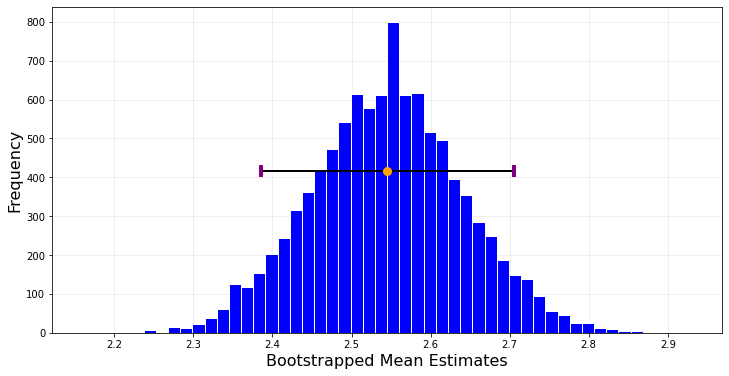

In [20]:
# Code your answer here:
ample = dfWidg['widg'].sample(n=200)
def meanBootstrap(sample):
    num_boots = 10000
    arrayMeans = np.array([np.mean(np.random.choice(sample, replace=True, size=len(sample))) for ii in range(num_boots)])
    l = np.percentile(arrayMeans, 5.0)
    u = np.percentile(arrayMeans, 95.0)
    CI = np.array([l,u])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(arrayMeans).hist(ax=ax, color="blue", edgecolor="white", bins=50, density=False)

    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
   #indicates the 90% CI
    ax.plot([CI[0], CI[1]], [num_boots/24, num_boots/24], color="black", lw=2)
    ax.plot([CI[0], CI[0]], [num_boots/24-10, num_boots/24+10], color="purple", lw=4)
    ax.plot([CI[1], CI[1]], [num_boots/24-10, num_boots/24+10], color="purple", lw=4)
    plt.plot(meanData, [num_boots/24], marker='o', markersize=8, color="orange")
    return CI 
meanBootstrap(sample)

In [21]:
The orange dot above signifies the actual mean of the sample.

SyntaxError: invalid syntax (3913878320.py, line 1)